<a href="https://colab.research.google.com/github/mostafa11244/MLproject/blob/main/Car_Purchase_Amount_Predictions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



**We are going to develop a machine learning model to predict the total amount that customers are willing to pay while purchasing a car given the following attributes:**

Customer Name

Customer e-mail

Country

Gender

Age

Annual Salary

Credit Card Debt

Net Worth


The model should predict:


Car Purchase Amount



In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()

In [3]:
data =pd.read_csv('https://raw.githubusercontent.com/PRIYANG-BHATT/Datasets/main/DS/Car_Purchasing_Data.csv')
data

,Customer Name,Customer e-mail,Country,Gender,Age,Annual Salary,Credit Card Debt,Net Worth,Car Purchase Amount
0,Martina Avila,cubilia.Curae.Phasellus@quisaccumsanconvallis.edu,USA,0,42,62812.09301,11609.380910,238961.2505,35321.45877
1,Harlan Barnes,eu.dolor@diam.co.uk,USA,0,41,66646.89292,9572.957136,530973.9078,45115.52566
2,Naomi Rodriquez,vulputate.mauris.sagittis@ametconsectetueradip...,USA,1,43,53798.55112,11160.355060,638467.1773,42925.70921
3,Jade Cunningham,malesuada@dignissim.com,USA,1,58,79370.03798,14426.164850,548599.0524,67422.36313
4,Cedric Leach,felis.ullamcorper.viverra@egetmollislectus.net,USA,1,57,59729.15130,5358.712177,560304.0671,55915.46248
...,...,...,...,...,...,...,...,...,...
495,Walter,ligula@Cumsociis.ca,USA,0,41,71942.40291,6995.902524,541670.1016,48901.44342
496,Vanna,Cum.sociis.natoque@Sedmolestie.edu,USA,1,38,56039.49793,12301.456790,360419.0988,31491.41457
497,Pearl,penatibus.et@massanonante.com,USA,1,54,68888.77805,10611.606860,764531.3203,64147.28888
498,Nell,Quisque.varius@arcuVivamussit.net,USA,1,59,49811.99062,14013.034510,337826.6382,45442.15353


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Customer Name        500 non-null    object 
 1   Customer e-mail      500 non-null    object 
 2   Country              500 non-null    object 
 3   Gender               500 non-null    int64  
 4   Age                  500 non-null    int64  
 5   Annual Salary        500 non-null    float64
 6   Credit Card Debt     500 non-null    float64
 7   Net Worth            500 non-null    float64
 8   Car Purchase Amount  500 non-null    float64
dtypes: float64(4), int64(2), object(3)
memory usage: 35.3+ KB


In [5]:
data.isnull().sum()


Customer Name          0
Customer e-mail        0
Country                0
Gender                 0
Age                    0
Annual Salary          0
Credit Card Debt       0
Net Worth              0
Car Purchase Amount    0
dtype: int64

In [8]:
data.describe()

,Gender,Age,Annual Salary,Credit Card Debt,Net Worth,Car Purchase Amount
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000
mean,0.506000,46.224000,62127.239608,9607.645049,431475.713625,44209.799218
std,0.500465,7.990339,11703.378228,3489.187973,173536.756340,10773.178744
min,0.000000,20.000000,20000.000000,100.000000,20000.000000,9000.000000
25%,0.000000,41.000000,54391.977195,7397.515792,299824.195900,37629.896040
50%,1.000000,46.000000,62915.497035,9655.035568,426750.120650,43997.783390
75%,1.000000,52.000000,70117.862005,11798.867487,557324.478725,51254.709517
max,1.000000,70.000000,100000.000000,20000.000000,1000000.000000,80000.000000


In [16]:
data=data.drop(['Customer Name','Customer e-mail'],axis=1)
data

,Country,Gender,Age,Annual Salary,Credit Card Debt,Net Worth,Car Purchase Amount
0,USA,0,42,62812.09301,11609.380910,238961.2505,35321.45877
1,USA,0,41,66646.89292,9572.957136,530973.9078,45115.52566
2,USA,1,43,53798.55112,11160.355060,638467.1773,42925.70921
3,USA,1,58,79370.03798,14426.164850,548599.0524,67422.36313
4,USA,1,57,59729.15130,5358.712177,560304.0671,55915.46248
...,...,...,...,...,...,...,...
495,USA,0,41,71942.40291,6995.902524,541670.1016,48901.44342
496,USA,1,38,56039.49793,12301.456790,360419.0988,31491.41457
497,USA,1,54,68888.77805,10611.606860,764531.3203,64147.28888
498,USA,1,59,49811.99062,14013.034510,337826.6382,45442.15353


In [17]:
for col in data.columns:
    print(col + '\n------')
    print(data[col].value_counts())
    print('=========================================================')

Country
------
USA    500
Name: Country, dtype: int64
Gender
------
1    253
0    247
Name: Gender, dtype: int64
Age
------
43    34
51    29
42    26
47    25
48    25
40    24
44    23
45    23
53    20
46    19
50    19
41    19
57    17
55    16
52    15
49    14
37    14
39    14
56    11
35    10
54    10
38    10
33    10
32     9
36     9
58     7
34     6
59     6
63     6
62     5
61     5
60     5
30     3
29     2
70     2
20     1
31     1
27     1
22     1
65     1
64     1
28     1
25     1
Name: Age, dtype: int64
Annual Salary
------
62812.09301    1
45504.74866    1
92471.17612    1
49661.96712    1
41587.39238    1
              ..
67247.07698    1
72637.84482    1
39488.45582    1
65919.59731    1
61370.67766    1
Name: Annual Salary, Length: 500, dtype: int64
Credit Card Debt
------
11609.380910    1
9245.466786     1
5404.397644     1
4679.441732     1
5397.031602     1
               ..
9851.689538     1
14938.506130    1
10992.333830    1
7594.363993     1
9391.3

In [18]:
data

,Country,Gender,Age,Annual Salary,Credit Card Debt,Net Worth,Car Purchase Amount
0,USA,0,42,62812.09301,11609.380910,238961.2505,35321.45877
1,USA,0,41,66646.89292,9572.957136,530973.9078,45115.52566
2,USA,1,43,53798.55112,11160.355060,638467.1773,42925.70921
3,USA,1,58,79370.03798,14426.164850,548599.0524,67422.36313
4,USA,1,57,59729.15130,5358.712177,560304.0671,55915.46248
...,...,...,...,...,...,...,...
495,USA,0,41,71942.40291,6995.902524,541670.1016,48901.44342
496,USA,1,38,56039.49793,12301.456790,360419.0988,31491.41457
497,USA,1,54,68888.77805,10611.606860,764531.3203,64147.28888
498,USA,1,59,49811.99062,14013.034510,337826.6382,45442.15353


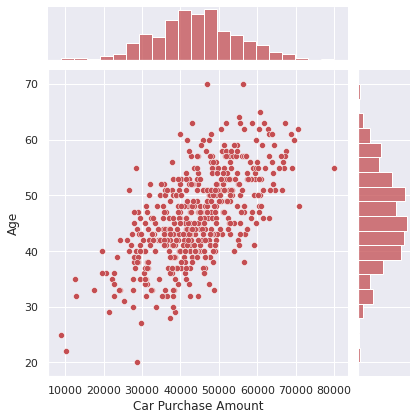

In [23]:
sns.jointplot(data=data,y= 'Age',x='Car Purchase Amount',color='r')

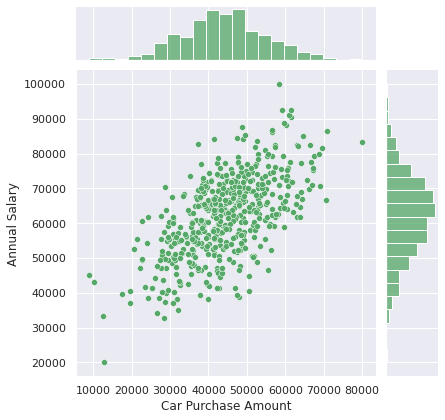

In [25]:
sns.jointplot(data=data,y= 'Annual Salary',x='Car Purchase Amount',color='g')

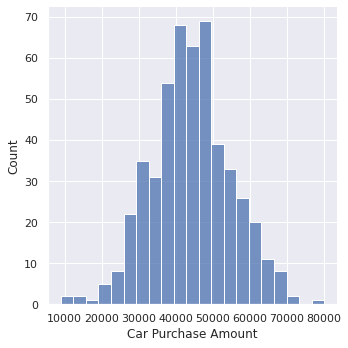

In [22]:
sns.displot(data['Car Purchase Amount'],color='b')

<Axes: xlabel='Gender'>

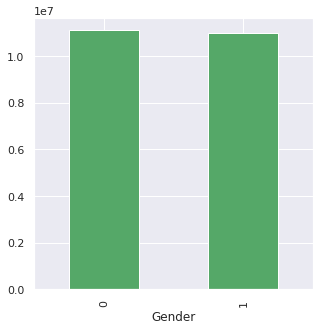

In [34]:
data.groupby('Gender')['Car Purchase Amount'].sum().plot(kind='bar',figsize=(5,5),color='g')

In [38]:
data.describe()

,Gender,Age,Annual Salary,Credit Card Debt,Net Worth,Car Purchase Amount
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000
mean,0.506000,46.224000,62127.239608,9607.645049,431475.713625,44209.799218
std,0.500465,7.990339,11703.378228,3489.187973,173536.756340,10773.178744
min,0.000000,20.000000,20000.000000,100.000000,20000.000000,9000.000000
25%,0.000000,41.000000,54391.977195,7397.515792,299824.195900,37629.896040
50%,1.000000,46.000000,62915.497035,9655.035568,426750.120650,43997.783390
75%,1.000000,52.000000,70117.862005,11798.867487,557324.478725,51254.709517
max,1.000000,70.000000,100000.000000,20000.000000,1000000.000000,80000.000000


In [35]:
data.columns

Index(['Country', 'Gender', 'Age', 'Annual Salary', 'Credit Card Debt',
       'Net Worth', 'Car Purchase Amount'],
      dtype='object')

In [36]:
x = data.drop(['Country','Car Purchase Amount'],axis=1)

y = data['Car Purchase Amount']

In [39]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test=train_test_split(x,y,test_size=0.2)

In [40]:
x_test.shape,x_train.shape,y_test.shape,y_train.shape

((100, 5), (400, 5), (100,), (400,))

In [44]:
from sklearn.preprocessing import StandardScaler
scaler =StandardScaler()

In [45]:
scaler.fit(x_train)
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

In [46]:
x_train

array([[-1.0100505 ,  1.22780297, -0.37946208, -1.1245836 , -0.08670131],
       [-1.0100505 , -0.27218539,  0.73969434, -0.51572393,  0.75624749],
       [ 0.9900495 , -0.64718248, -0.09282131, -1.77852803, -0.20161837],
       ...,
       [-1.0100505 , -0.39718442, -1.02433509, -2.47278567, -0.46474344],
       [ 0.9900495 ,  1.22780297, -1.34387116,  0.59092696,  0.98449841],
       [-1.0100505 ,  1.352802  ,  0.37470404, -0.73122512, -1.48160564]])

In [48]:
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error

In [49]:
models={
    'LR':LinearRegression(),
    'KNNR':KNeighborsRegressor(),
    'SVR':SVR(),
    'DT':DecisionTreeRegressor(),
    'RF':RandomForestRegressor(),
    'XGBR':XGBRegressor()
}

In [51]:
for name, model in models.items():
    print(f'Using model: {name}')
    model.fit(x_train, y_train)
    print(f'Training score :{model.score(x_train,y_train)}')
    print(f'Test Score :{model.score(x_test,y_test)}')
    y_pred= model.predict(x_test)
    print(f'RMSE: {np.sqrt(mean_squared_error(y_test,y_pred))}')
    print('======================================================')

Using model: LR
Training score :0.9994556847849463
Test Score :0.9996047518175287
RMSE: 243.74981453401708
Using model: KNNR
Training score :0.9346828609375546
Test Score :0.8834859877212122
RMSE: 4185.028617779677
Using model: SVR
Training score :0.00331742109298494
Test Score :-0.03211896538226111
RMSE: 12455.874744449495
Using model: DT
Training score :1.0
Test Score :0.8787520078995691
RMSE: 4269.201278452433
Using model: RF
Training score :0.9928180484031596
Test Score :0.9386315980662312
RMSE: 3037.258528680373
Using model: XGBR
Training score :0.9999893992762657
Test Score :0.9603826322070456
RMSE: 2440.3502450234964


In [52]:
model = LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

In [53]:
y_pred = model.predict(x_test)
y_pred

array([47308.05454791, 40976.88158544, 34894.05000644, 46132.36803506,
       48640.94162869, 65714.93459863, 29466.67609065, 33455.67294194,
       32601.01880243, 25028.85862046, 55460.82347033, 35827.5306785 ,
       52553.98501354, 42390.48429124, 53796.04079868, 30820.40403674,
       67236.58758604, 56392.65784985, 31577.33315525, 32562.93820545,
       48047.09458494, 39443.80820557, 41206.30142135, 60564.56807235,
       41474.78990913, 42864.58530913, 66076.74261182, 53249.51514176,
       35649.9381263 , 49037.67276289, 31458.40459851, 46498.58410373,
       31229.39826032, 47733.01201876, 64334.5512729 , 19434.31459073,
       40756.45263653, 36743.30568658, 46637.9108818 , 52642.96462225,
       19181.5599427 , 52090.18821091, 57973.07796895, 46910.20585783,
       36723.83666603, 39703.32366235, 56457.06431804, 53185.79317177,
       48100.21258939, 55072.65887423, 41965.23941679, 48855.51774784,
       39738.79767839, 12836.72761219, 46010.75711074, 57250.00080848,
      

In [55]:
y_test.values

array([47143.44008, 41221.24918, 35139.24793, 45857.75365, 48734.35708,
       65592.22012, 29540.87013, 33131.52734, 32967.20191, 25252.93221,
       55420.56668, 35726.95299, 52709.08196, 42408.02625, 54013.47595,
       31146.71078, 67120.89878, 56579.90338, 31215.6421 , 32737.80177,
       48266.75516, 39410.4616 , 41456.68097, 60222.22672, 41679.7929 ,
       42905.53815, 66363.89316, 53655.53859, 36019.9556 , 49065.1634 ,
       31249.98803, 46892.26617, 31540.77868, 47604.34591, 64188.26862,
       19553.2739 , 41104.07108, 36645.5609 , 46937.17422, 52785.16947,
       19525.29827, 52313.98392, 58045.56257, 46710.52519, 36517.70996,
       39904.81613, 56510.13294, 53049.44567, 48383.69071, 55125.93237,
       41575.34739, 49079.61942, 40077.57289, 12895.71468, 46135.27233,
       57303.87131, 60461.24268, 52983.89411, 44577.44829, 48955.85816,
       49730.53339, 49392.8897 , 42866.21274, 48785.15839, 80000.     ,
       64391.68906, 12536.93842, 55167.37361, 48901.44342, 30841

In [56]:
import joblib

In [57]:
joblib.dump(model, 'model.lr')

['model.lr']

In [58]:
joblib.dump(scaler, 'model.lr')

['model.lr']